In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [62]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [63]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [64]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [65]:
# pre-processing
def get_dias_fechados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-02-12', '2018-02-13', '2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (vesperas_dia_festivo_current[j] != get_dias_festivos()[o]):
                    vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (pos_dia_festivo_current[j] != get_dias_festivos()[o]):
                    pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

def get_trimestres_indicadores(series, indicator, period):
    val = []
    trimestres_template = df_vendas.groupby(pd.to_datetime(df_vendas['DATA']).dt.to_period(period))['VENDAS'].agg(indicator)
    for i in range(len(series)):
        val.append(trimestres_template[series[i]].astype(int))
    return val

def round_with_range(series):
    val = []
    for i in range(len(series)):
        current_number = series[i].round()
        if (current_number >= 0) & (current_number <= 5):
            val.append(5)
        elif (current_number >= 6) & (current_number <= 10):
            val.append(10)
        elif (current_number >= 11) & (current_number <= 15):
            val.append(15)
        elif (current_number >= 16) & (current_number <= 20):
            val.append(20)
        elif (current_number >= 21) & (current_number <= 25):
            val.append(25)
        elif (current_number >= 26) & (current_number <= 30):
            val.append(30)
        elif (current_number >= 31) & (current_number <= 35):
            val.append(35)
        elif (current_number >= 36) & (current_number <= 40):
            val.append(40)
        elif (current_number >= 41) & (current_number <= 45):
            val.append(45)
        elif (current_number >= 46) & (current_number <= 50):
            val.append(50)
        elif (current_number >= 51) & (current_number <= 55):
            val.append(55)
        elif (current_number >= 56) & (current_number <= 60):
            val.append(60)
        elif (current_number >= 61) & (current_number <= 65):
            val.append(65)
        elif (current_number >= 66) & (current_number <= 70):
            val.append(70)
        elif (current_number >= 71) & (current_number <= 75):
            val.append(75)
        elif (current_number >= 76) & (current_number <= 80):
            val.append(80)
        elif (current_number >= 81) & (current_number <= 85):
            val.append(85)
        elif (current_number >= 86) & (current_number <= 90):
            val.append(90)
        elif (current_number >= 91) & (current_number <= 95):
            val.append(95)
        elif (current_number >= 96) & (current_number <= 100):
            val.append(100)
    return val

def set_vendas_ontem(df):
    df_vendas_ontem = df['VENDAS'].shift(1)
    df_vendas_ontem[0:1] = df[0:1]['VENDAS']
    return df_vendas_ontem

# preprocessing
df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA'], dayfirst=True)))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=3, column='ABERTO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=4, column='FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=5, column='DS', value=(~pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=6, column='DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=7, column='VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=8, column='POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=9, column='DATA_NAO_FESTIVA', value=((~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos()))).astype(int))
df.insert(loc=10, column='FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=11, column='NAO_FERIADO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=12, column='SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=13, column='SEMANA_DE_NAO_PAGAMENTO', value=(~pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=14, column='BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=15, column='ALTA_TEMPORADA', value=(~pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=16, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=17, column='PRECIPITACAO', value=(round_with_range(df_temp['PRECIPITACAO'])))
df.insert(loc=18, column='TEMPERATURA', value=(round_with_range(df_temp['TEMPERATURA'])))
df.insert(loc=19, column='UMIDADE', value=(round_with_range(df_temp['UMIDADE'])))
df.insert(loc=20, column='VENDAS_MEDIA_TRIM', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('Q').astype(str), 'mean', 'Q')))
df.insert(loc=21, column='VENDAS_MEDIA_MES', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('M').astype(str), 'mean', 'M')))
df.insert(loc=22, column='VENDAS_STD_TRIM', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('Q').astype(str), 'std', 'Q')))
df.insert(loc=23, column='VENDAS_STD_MES', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('M').astype(str), 'std', 'M')))
df.insert(loc=24, column='VENDAS_ONTEM', value=(set_vendas_ontem(df)))

# dropping columns after EDA ('DS', 'DATA_NAO_FESTIVA', 'BAIXA_TEMPORADA', 'SEMANA_DE_NAO_PAGAMENTO', 'NAO_FERIADO' = ambiguos)
df = df.query('FECHADO == 0 and ABERTO == 1')
df = df.drop(columns=['FECHADO', 'ABERTO', 'DS', 'DATA_NAO_FESTIVA', 'BAIXA_TEMPORADA', 'SEMANA_DE_NAO_PAGAMENTO', 'NAO_FERIADO'])

# removing outliers (lower then 3% of occurencies)
df = df.query('VENDAS < 200 and VENDAS > 70')

# max rows view
pd.set_option('display.max_rows', 500)

In [66]:
print(f'format: {df.shape}')
print(f'has null: {df.isnull().values.any()}')
print(f'has n/a: {df.isna().values.any()}')

df_aggregated = df.groupby([df['DATA'].dt.year, df['DATA'].dt.month]).agg({'count'})
df_aggregated[['VENDAS']]

format: (715, 18)
has null: False
has n/a: False


VENDAS
           count
DATA DATA       
2018 2        13
     3        30
     4        30
     5        27
     6        30
     7        31
     8        31
     9        30
     10       30
     11       29
     12       24
2019 1        29
     2        28
     3        26
     4        29
     5        30
     6        30
     7        31
     8        31
     9        30
     10       31
     11       28
     12       27
2020 1        28
     2        27
     3         5

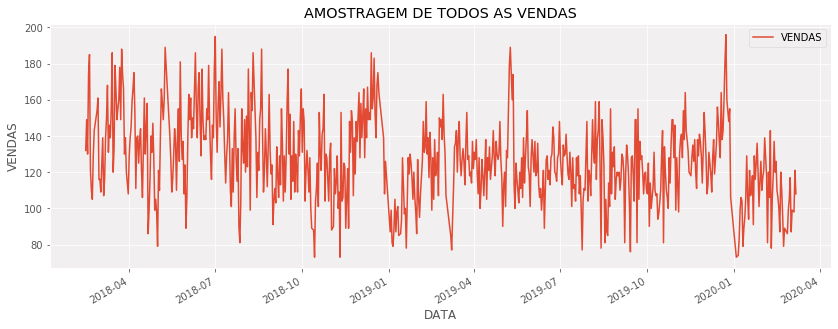

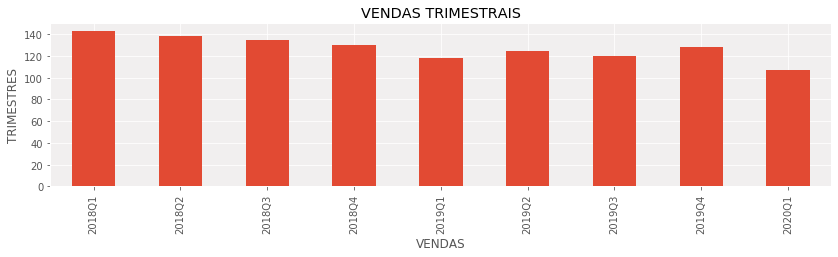

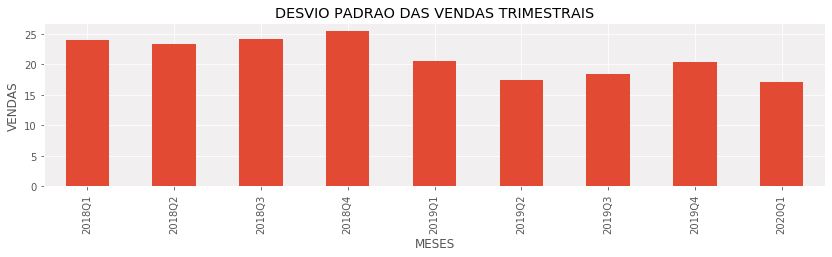

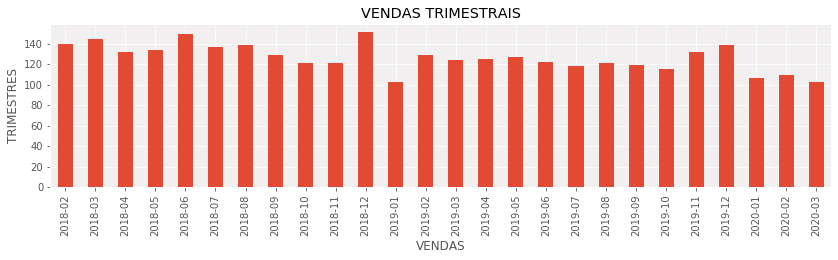

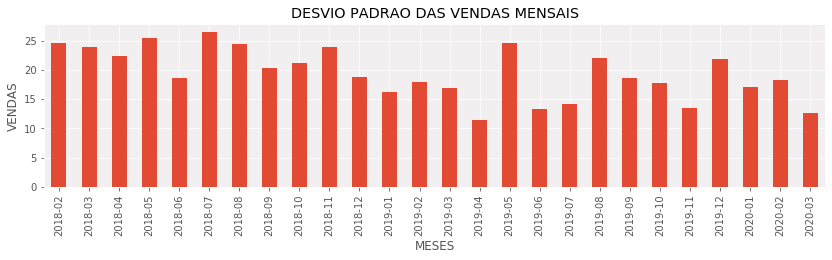

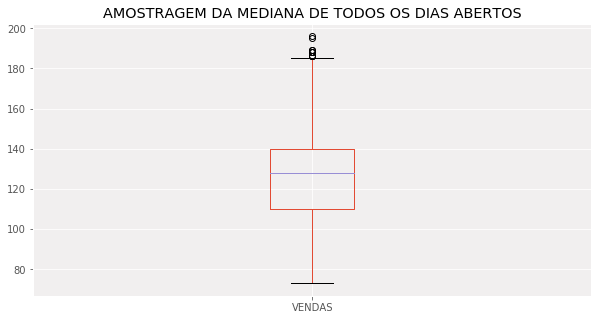

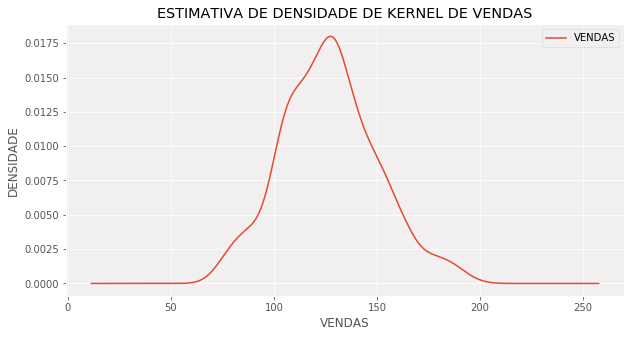

In [67]:
import matplotlib.style as style
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = '#F1EFEF'

ax = df.plot(y=['VENDAS'], x='DATA', figsize=(14, 5))
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS AS VENDAS')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()    

df_quarter = pd.DataFrame({'DATA': pd.to_datetime(df['DATA']), 'TEMPERATURA': df['TEMPERATURA'], 'VENDAS': df['VENDAS']})

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS TRIMESTRAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS MENSAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

plt.rcParams['axes.facecolor'] = '#F1EFEF'
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANA DE TODOS OS DIAS ABERTOS')
plt.show()

plt.rcParams['axes.facecolor'] = '#F1EFEF'
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

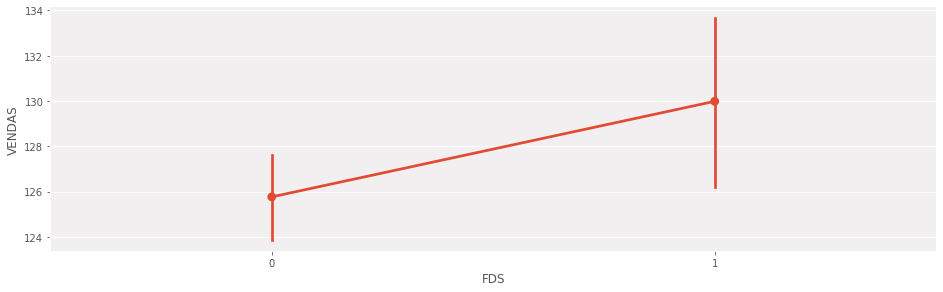

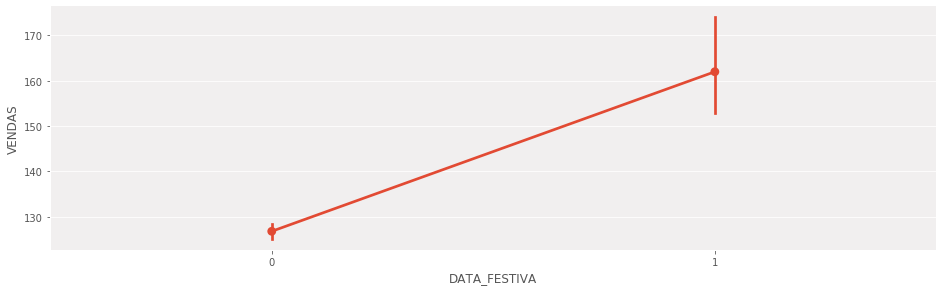

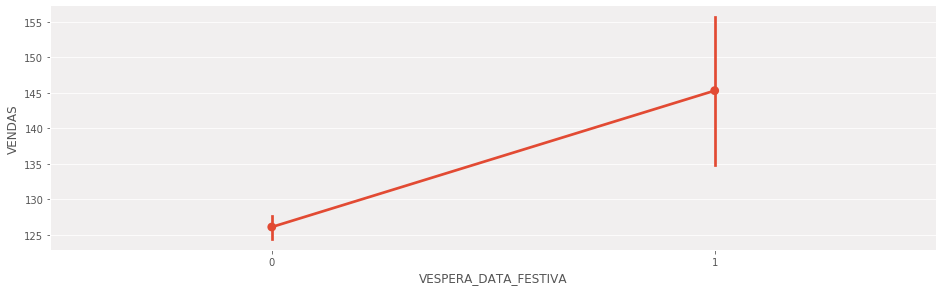

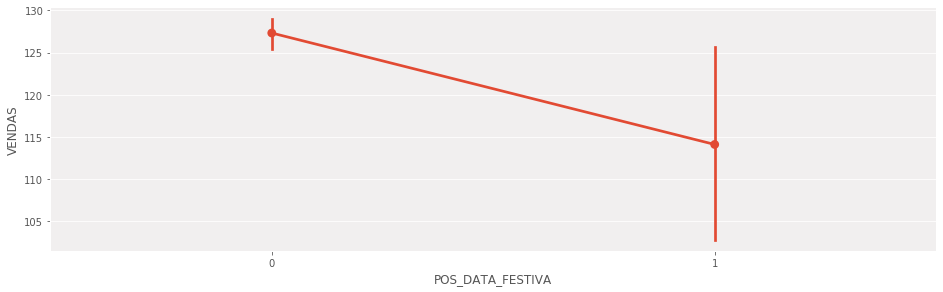

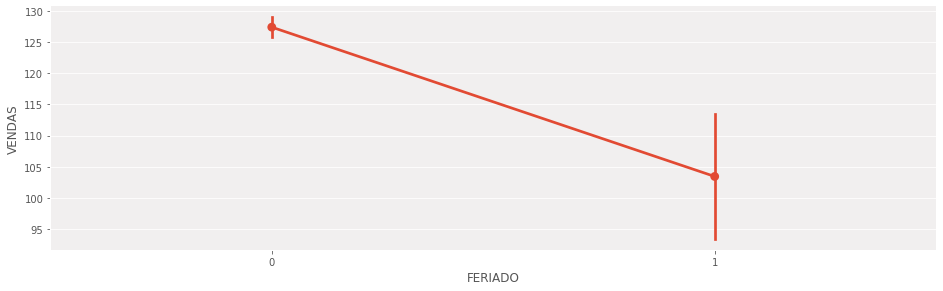

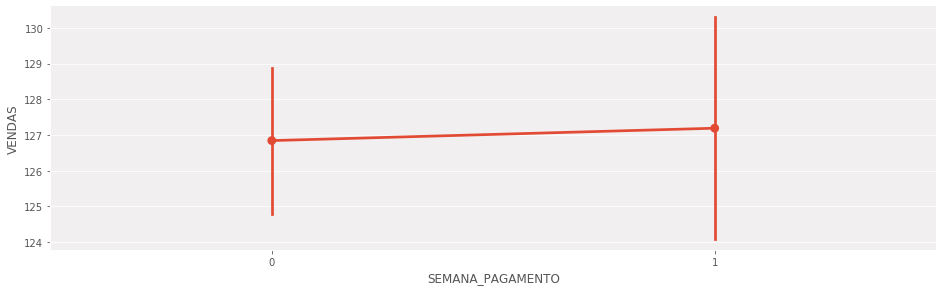

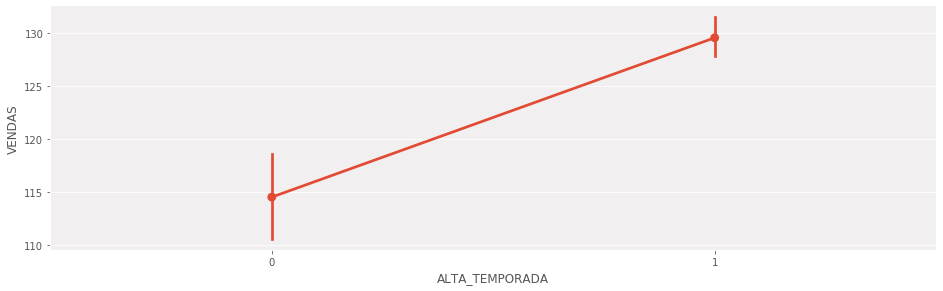

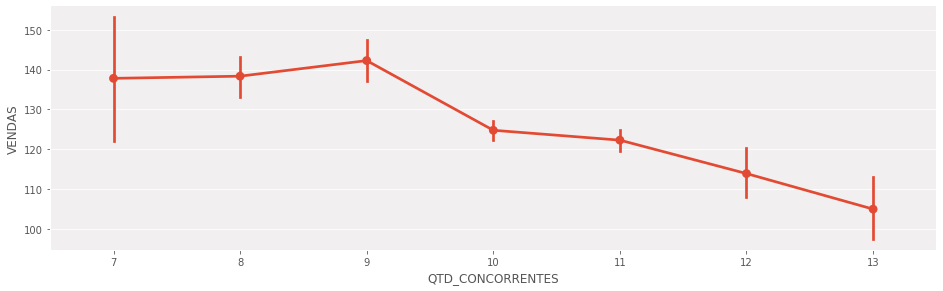

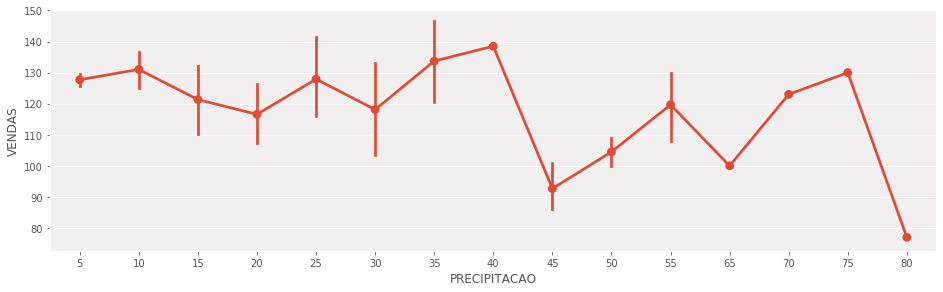

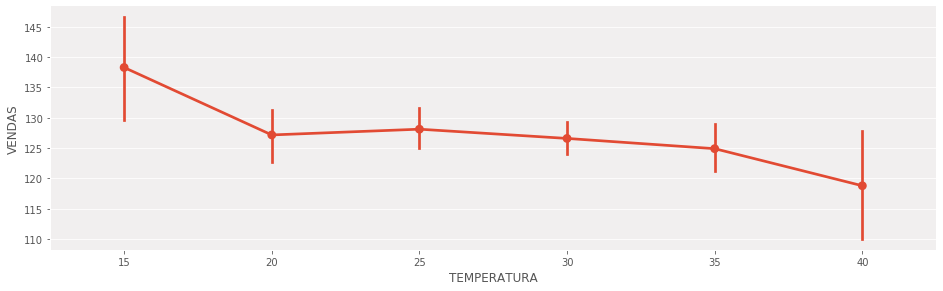

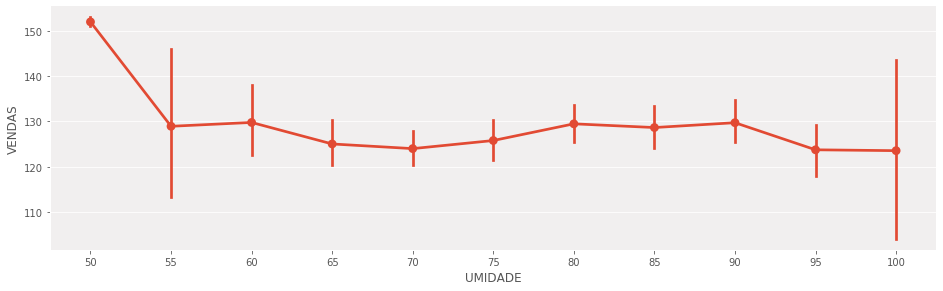

In [68]:
import seaborn as sns

df_scatter = df.sort_values(by=['VENDAS'], ascending=True)

c = sns.catplot('FDS', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('VESPERA_DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('POS_DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('FERIADO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('SEMANA_PAGAMENTO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('ALTA_TEMPORADA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('QTD_CONCORRENTES', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('PRECIPITACAO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('TEMPERATURA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('UMIDADE', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

RMSE (cross validation): 19.71
MAE (cross validation): 15.16
RMSE: 17.07
MAE: 13.24
R2: -0.06


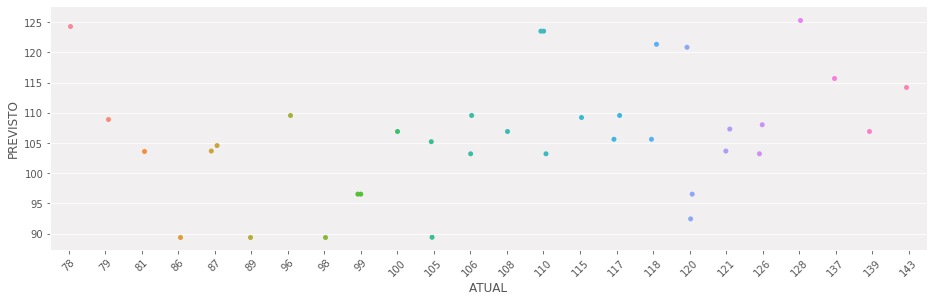

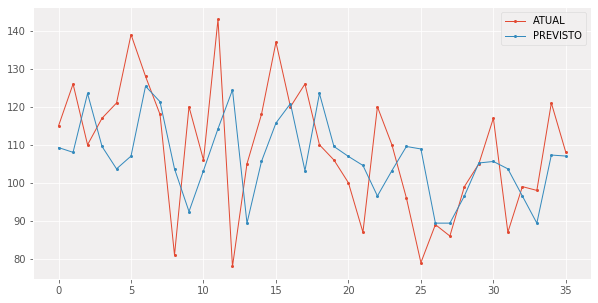

Weight,Feature
0.1795 ± 0.1054,VENDAS_MEDIA_MES
0.0846 ± 0.4639,VENDAS_ONTEM
0 ± 0.0000,QTD_CONCORRENTES
0 ± 0.0000,FERIADO
0 ± 0.0000,DATA_FESTIVA


In [90]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.ensemble import GradientBoostingRegressor

matplotlib.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS', 'POS_DATA_FESTIVA', 'ALTA_TEMPORADA',  'VENDAS_STD_MES', 'PRECIPITACAO', 'FDS',  'VESPERA_DATA_FESTIVA', 'VENDAS_MEDIA_TRIM', 'UMIDADE', 'SEMANA_PAGAMENTO', 'VENDAS_STD_TRIM', 'TEMPERATURA'])
y = df.drop(columns=['DATA', 'FDS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'FERIADO', 
                     'SEMANA_PAGAMENTO',  'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 
                     'TEMPERATURA', 'UMIDADE', 'VENDAS_MEDIA_TRIM', 'VENDAS_MEDIA_MES', 'VENDAS_STD_TRIM', 'VENDAS_STD_MES', 'VENDAS_ONTEM'])

# save features names
features = X.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=8, shuffle=False)
y_train = np.array(y_train)
y_test = np.array(y_test)

# feature scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.fit_transform(X)

# model
gb = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=25,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=21, min_samples_split=16,
                          min_weight_fraction_leaf=0.0, n_estimators=139,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# cross validation
scores = cross_val_score(gb, X, y, scoring='neg_root_mean_squared_error', cv=5)
scores_mae = cross_val_score(gb, X, y, scoring='neg_mean_absolute_error', cv=5)
predicted = cross_val_predict(gb, X, y, cv=5)
print(f'RMSE (cross validation): %.2f' % np.abs(scores).min())
print(f'MAE (cross validation): %.2f' % np.abs(scores_mae).min())

# manual training
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'RMSE: %.2f' % metrics.mean_squared_error(y_test, y_pred, squared=False))
print(f'MAE: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print(f'R2: %.2f' % metrics.r2_score(y_test, y_pred))

# scatter
c = sns.catplot('ATUAL', 'PREVISTO', data=pd.DataFrame({'PREVISTO': y_pred.flatten(), 'ATUAL': y_test.flatten() }))
c.set_xticklabels(rotation=45)
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

# plot
df1 = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(gb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)


In [85]:
# from scipy.stats import randint as sp_randint
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'loss': ['ls'],
#     'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
#     'n_estimators': list(range(150, 201)),
#     'subsample': [1.0],
#     'criterion': ['mse'],
#     'min_samples_split': list(range(1, 41)),
#     'min_samples_leaf': list(range(1, 41)),
#     'min_weight_fraction_leaf': [0.0],
#     'max_depth': list(range(3, 41)),
#     'min_impurity_split': [None],
#     'random_state': [1],
#     'alpha': [0.9],
#     'warm_start': [False],
#     'ccp_alpha': [0.0],
# }

# search_obj = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=params, n_jobs=-1)
# fit_obj = search_obj.fit(X_train, y_train)
# print(fit_obj.best_estimator_)

# # modeling
# b_model = fit_obj.best_estimator_
# b_model.fit(X_train, y_train)
# b_y_pred = b_model.predict(X_test)
# b_y_pred
# df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': b_y_pred.flatten()})
# df2.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
# plt.show()

# # printing first metrics
# print(f'RMSE: {metrics.mean_squared_error(y_test, b_y_pred, squared=False)}')